In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [2]:
boston = load_boston()

In [3]:
boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [5]:
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
x_data.shape

(506, 13)

In [7]:
y_data # 라벨 MEDV : 주택 중위 가격

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# make_pipeline으로 정규화와 모델에 데이터를 쉽게 넣기

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [10]:
# x_data를 StandardScaler 해주고 LinearRegression에 데이터를 줌

model = make_pipeline( StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [11]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7288292087883808
0.7598902112679308


### 그리고 심지어 정규화를 해주고 예측값을 도출함!

In [12]:
model.predict([x_test.iloc[0]])

array([32.2311163])

# 교차검증(Cross Validation) - 데이터가 작은 경우
- 데이터를 두 개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안 된 경우에는 잘못된 검증이 될 수 있음
- 이럴 경우에는 테스트셋을 여러 개로 구성하고 교차 검증을 진행
- cross_val_score()함수는 교차 검증을 수행하여 모델을 검증

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
r2Score = cross_val_score( model, x_data, y_data, cv=10, scoring='r2', verbose=1) # 학습하는 과정을 보기 위해 verbose
print(r2Score)
print(r2Score.mean())

[ 0.73548112  0.49493133 -1.23202674  0.64072455  0.55351432  0.74503616
  0.3932651  -0.12971166 -0.82383978  0.47620486]
0.18535792561755188


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


- R2 값이 높게 안나와서 다중공선성을 확인해 봐야 함(feature가 많은 경우)

# 다중 공선성

다중 공선성 회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적 영향을 미치는 현상
<br><br>
X1은 일평균 음주량을 독립변수 X2는 혈중 알코올 농도들의 상관관계가 높아 설명력이 약해진다.

회귀 모델에서 다중공선성을 파악할 수 있는 대표적인 방법은 VIF입니다. 
VIF (Variance inflation Factors 분산팽창요인)
- 안전 : VIF < 5
- 주의 : 5 < VIF < 10
- 위험 : 10 < VIF

VIF1의 의미 : 다른 변수의 선형결합으로 X1을 설명할 수 있는 정도

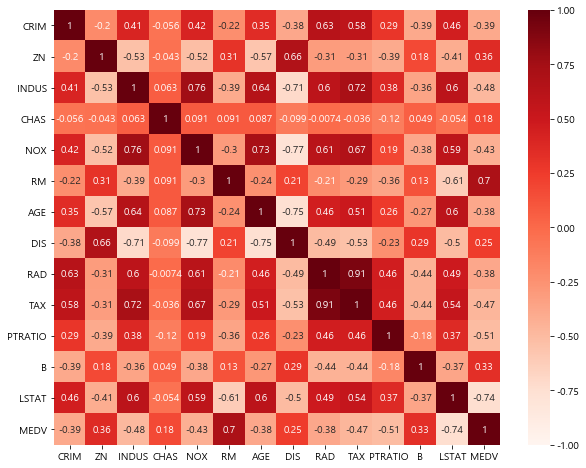

In [15]:
import seaborn as sb
plt.figure( figsize=(10,8) )
sb.heatmap( boston_df.corr(), annot=True, cmap='Reds', vmin=-1,vmax=1)
plt.show()

In [16]:
boston_df.shape[1]

14

In [17]:
boston_df.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [18]:
# 각각의 칼럼에 대한 공분산성을 체크

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(boston_df.values, i) for i in range(boston_df.shape[1])]
vif['features'] = boston_df.columns
vif

,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


### 특성 데이터가 많은 경우 : 다중공선성(컬럼 제거), 타겟(라벨)에 상관관계가 낮은 컬럼 제거
### 특성 데이터끼리는 상관이 없는게 좋고, 특성 데이터와 라벨 간에는 상관이 높은게 좋음!

# <문제>
## 캘리포니아 주택가격을 이용하여 교차검정, 다중공선성을 확인한 후에
## 다중 공선성이 높은 칼럼을 제외하고 학습하여 교차검정 값을 확인하시오.

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [19]:
from sklearn.datasets import fetch_california_housing

In [20]:
cal = fetch_california_housing()
cal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [21]:
dir(cal) # cal.keys()

['DESCR', 'data', 'feature_names', 'target']

In [22]:
cal['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [23]:
cal['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [24]:
cal_df = pd.DataFrame( cal['data'],columns=cal['feature_names'])
cal_df['Target'] =cal.target
cal_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [25]:
x_data = cal_df.iloc[:,:-1]
y_data = cal_df.iloc[:,-1]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [27]:
cal_model = make_pipeline( StandardScaler(), LinearRegression())
cal_model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [28]:
cal_r2Score = cross_val_score( cal_model, x_data, y_data, cv=10, scoring='r2', verbose=1)
print(cal_r2Score)
print(cal_r2Score.mean())

[0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
0.5110068610524554


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


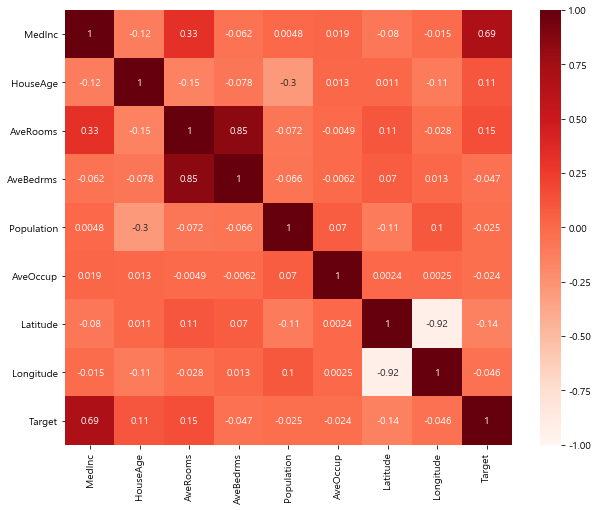

In [29]:
import seaborn as sb
plt.figure( figsize=(10,8) )
sb.heatmap( cal_df.corr(), annot=True, cmap='Reds', vmin=-1,vmax=1)
plt.show()

<Figure size 720x576 with 0 Axes>

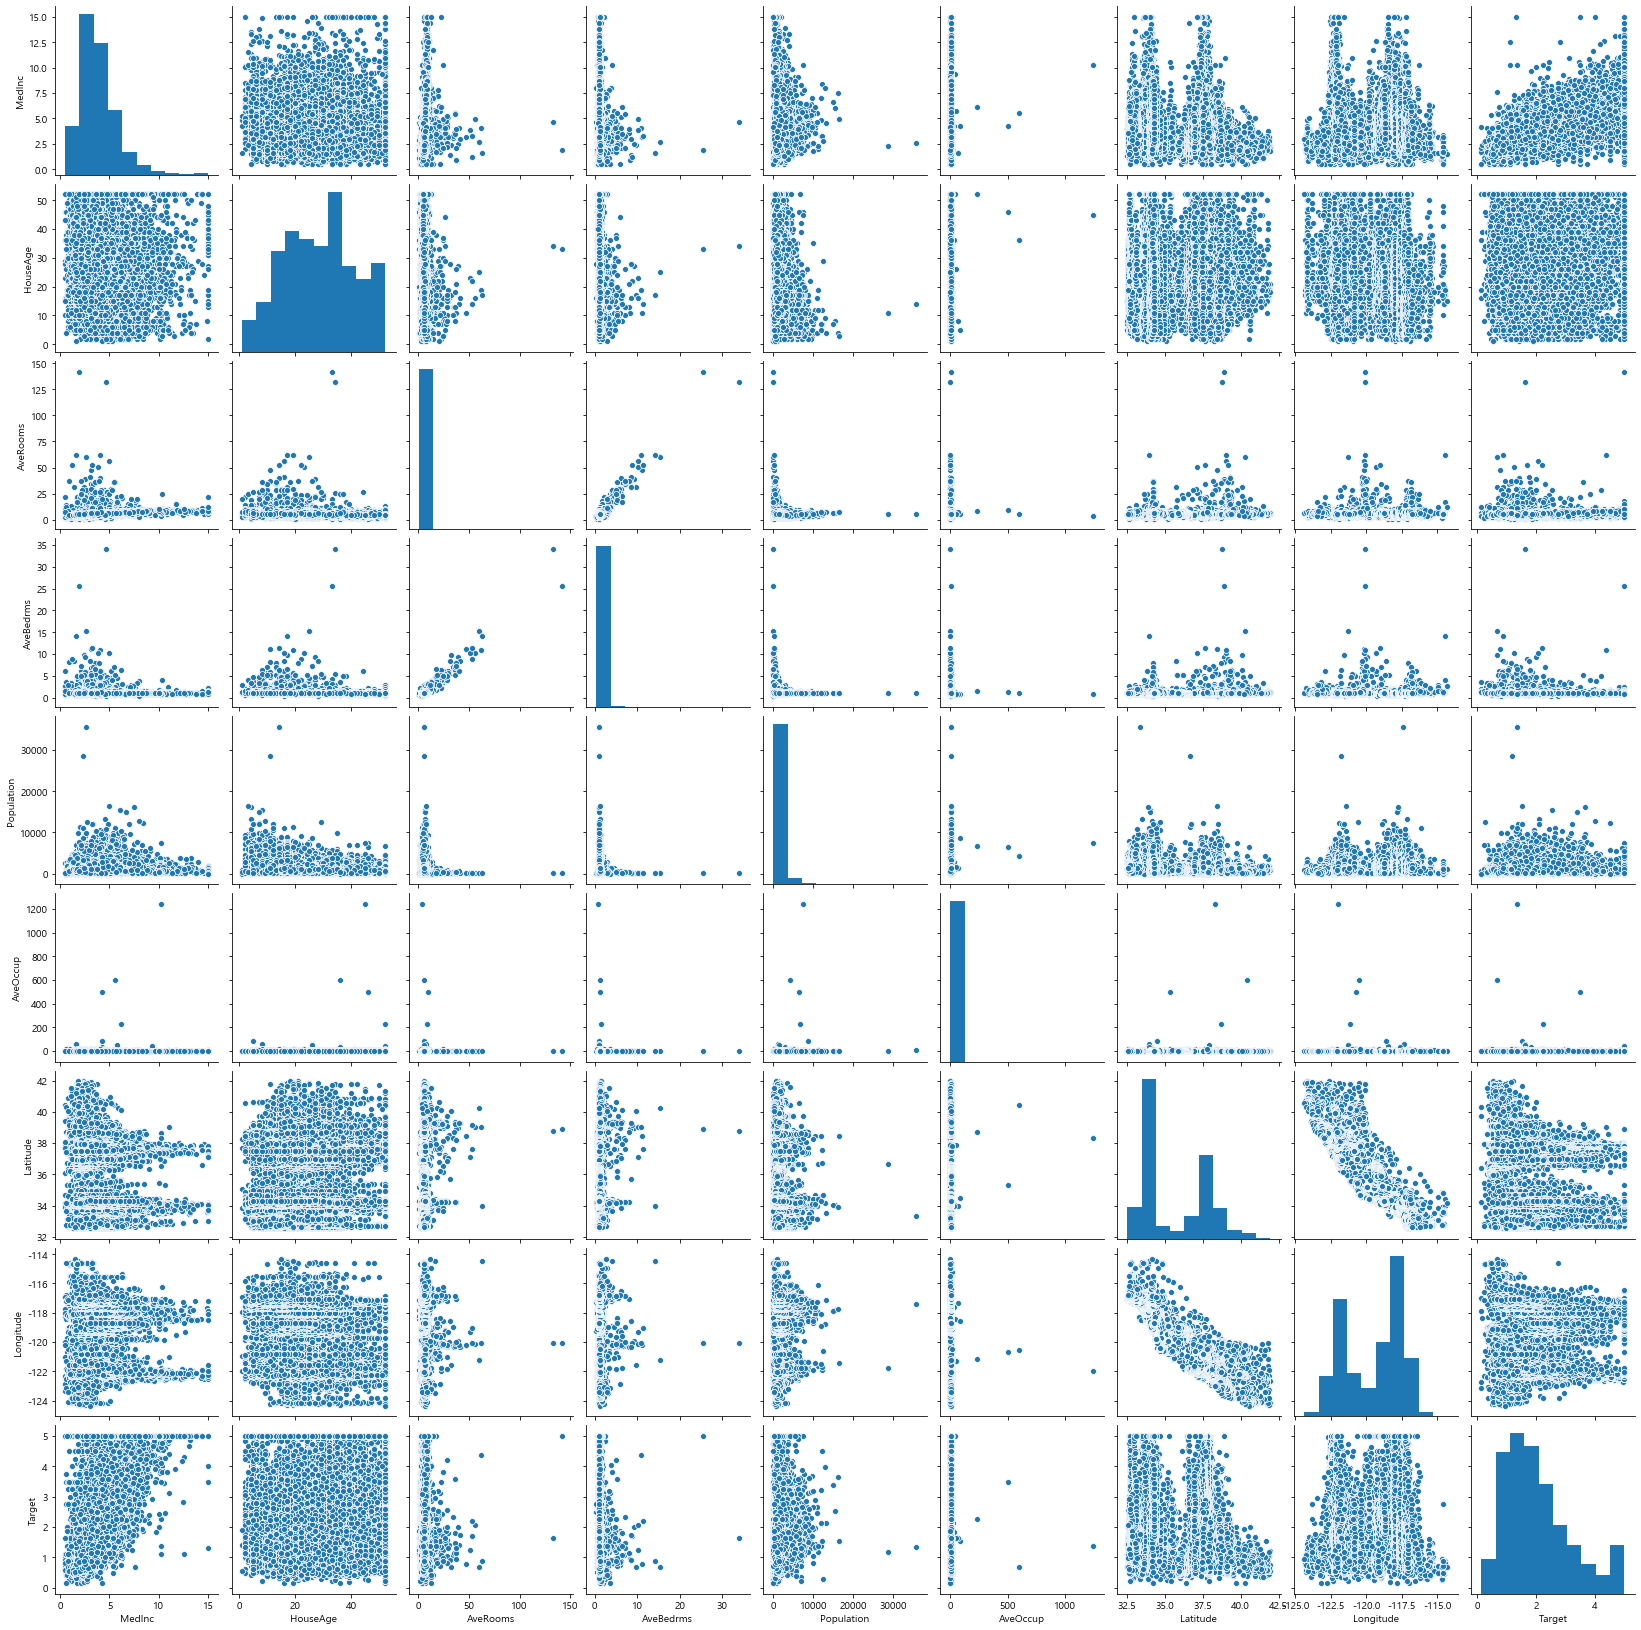

In [36]:
plt.figure( figsize=(10,8) )
sb.pairplot( cal_df )
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cal_vif = pd.DataFrame()
cal_vif['VIF Factor'] = [variance_inflation_factor(cal_df.values, i) for i in range(cal_df.shape[1])]
cal_vif['features'] = cal_df.columns
cal_vif

,VIF Factor,features
0,19.624998,MedInc
1,7.592663,HouseAge
2,47.956351,AveRooms
3,45.358192,AveBedrms
4,2.936078,Population
5,1.099530,AveOccup
6,568.497332,Latitude
7,640.064211,Longitude
8,9.285659,Target


- Latitude, Longitude 제거

In [31]:
cal_clean = cal_df.drop(['Latitude', 'Longitude'], axis=1, inplace=False)

In [32]:
x_data = cal_clean.iloc[:,:-1]
y_data = cal_clean.iloc[:,-1]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [34]:
cal_model2 = make_pipeline( StandardScaler(), LinearRegression())
cal_model2.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [35]:
cal_r2Score2 = cross_val_score( cal_model2, x_data, y_data, cv=10, scoring='r2', verbose=1)
print(cal_r2Score2)
print(cal_r2Score2.mean())

[0.53071132 0.4839093  0.38987981 0.48402382 0.5075654  0.49644267
 0.17024893 0.4105453  0.29452113 0.4514216 ]
0.421926928373032


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
